<a href="https://colab.research.google.com/github/pacayton/Stat145_Codes/blob/main/Chapter_2_STAT145.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Announcements:

Youtube Playlist for the lectures is already at UVLe.

Chapter 2:

Time Series Graphics

First thing: Upload data to Google Colab.

1. Click on the Files icon (folder icon) on the left side of the page

2. Click on the "Upload to session storage" icon (paper with an upward arrow) and a directory box appears.

3. Select your file through the directory and press OK.

In [15]:
## Preamble

## install.packages("fpp2")
library(fpp2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.3.6      ✔ fma       2.4   
✔ forecast  8.17.0     ✔ expsmooth 2.3   





"ts" Object

In [2]:
y <- ts(c(123, 39, 78,52,110), start = 2012)

To check:

In [3]:
summary(y)

y

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   39.0    52.0    78.0    80.4   110.0   123.0 

A Time Series:
[1] 123  39  78  52 110

In [4]:
str(y)

 Time-Series [1:5] from 2012 to 2016: 123 39 78 52 110


An example if you have time series with seasonal frequency

In [10]:
## Upload the data in R

Philmonth <- read.csv("/content/PhilMonthlyData.csv", header = TRUE)
str(Philmonth)

'data.frame':	264 obs. of  37 variables:
 $ X_date_         : chr  "1989-01-01" "1989-02-01" "1989-03-01" "1989-04-01" ...
 $ cpi             : num  NA NA NA NA NA NA NA NA NA NA ...
 $ cpifbt          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ deporate_savings: num  NA NA NA NA NA NA NA NA NA NA ...
 $ dubaicrude      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ expenditures    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ exports         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ fx_rate         : num  NA NA NA NA NA NA NA NA NA NA ...
 $ gir             : num  NA NA NA NA NA NA NA NA NA NA ...
 $ hotel_occupancy : num  NA NA NA NA NA NA NA NA NA NA ...
 $ imports         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ libor_3m        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ libor_6m        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ m1_imf          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ m2_imf          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ man_avecaputili : num  NA NA NA NA

In [11]:
remit <- ts(na.omit(Philmonth$remit), start = c(1989,1), frequency =12)

In [12]:
str(remit)
summary(remit)
remit

 Time-Series [1:260] from 1989 to 2011: 69351 64208 78221 77605 77835 83145 93250 80257 84382 106867 ...
 - attr(*, "na.action")= 'omit' int [1:4] 261 262 263 264


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64208  222472  519556  606239  871585 1623638 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1989,69351,64208,78221,77605,77835,83145,93250,80257,84382,106867,91606,95184
1990,97375,102632,114860,86088,122273,112946,113989,97218,96934,90926,86617,81151
1991,92956,81120,111299,153102,149258,119405,122664,109979,132334,201005,182858,193394
1992,176902,158774,198940,170870,156720,179826,200282,178021,216945,206479,177374,200655
1993,182086,166654,182438,193228,209373,199699,204305,199901,166310,175180,200229,196992
1994,210110,168738,212094,203983,223946,250374,273092,333705,272507,270896,274113,315189
1995,242223,218049,328607,273023,306555,355105,341468,390627,351839,349683,299342,412057
1996,351280,297429,498049,425963,340511,309672,518853,390149,251356,335011,230029,358189
1997,538672,558702,383832,398229,382604,358435,469888,534056,492329,528603,506461,590024
1998,1105343,602851,804827,575865,577774,506507,451982,310299,619745,642706,469835,700255


Time plots

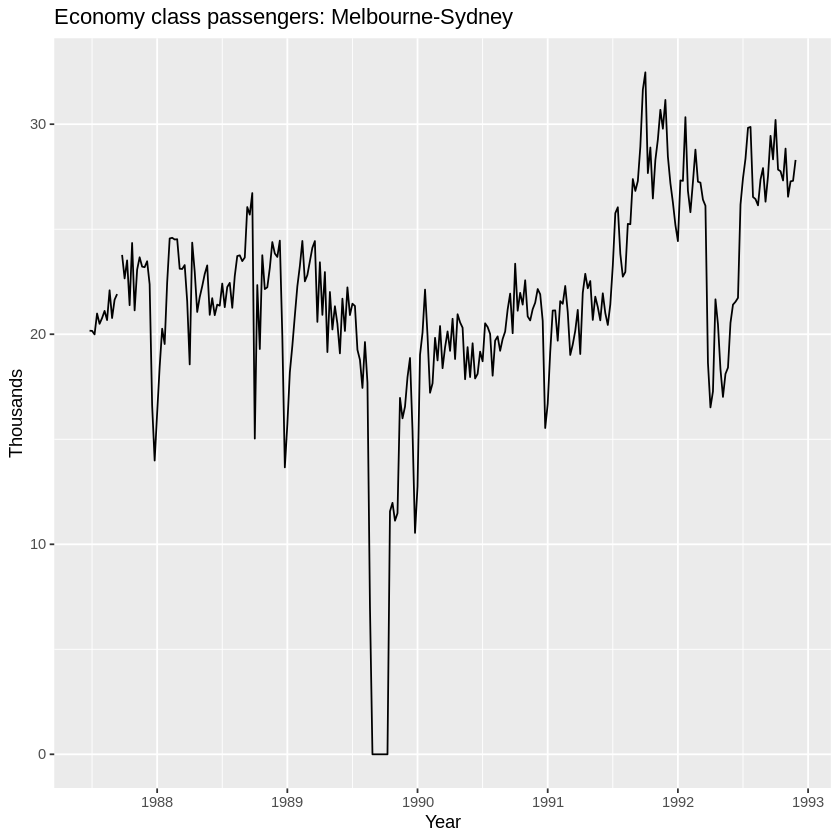

In [16]:
autoplot(melsyd[,"Economy.Class"]) +
  ggtitle("Economy class passengers: Melbourne-Sydney") +
  xlab("Year") +
  ylab("Thousands")

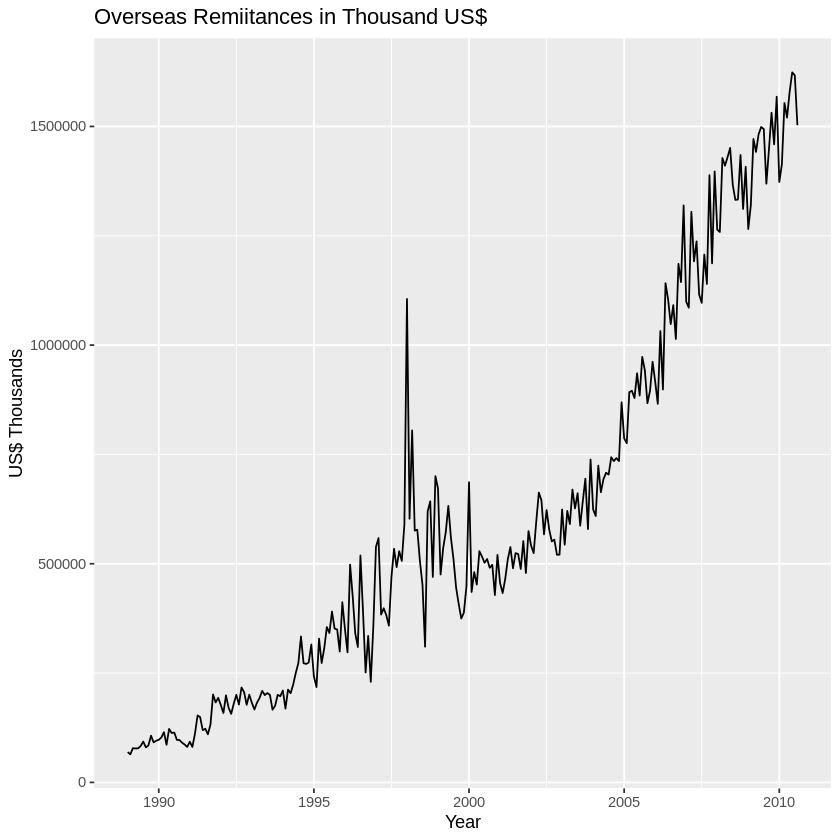

In [17]:
## Philippine Remittances

autoplot(remit) +
  ggtitle("Overseas Remiitances in Thousand US$") +
  xlab("Year") +
  ylab("US$ Thousands")

In [18]:
### Phil GDP

Philquarter <- read.csv("/content/PhilQuarterData.csv", header = TRUE)
gdp <- ts(Philquarter$gdp, start = c(1981,1), frequency = 4)

In [19]:
gdp

,Qtr1,Qtr2,Qtr3,Qtr4
1981,154381.0,159549.0,148592.0,168120.0
1982,159109.0,165495.0,151909.0,176954.0
1983,164767.0,174926.0,154601.0,171423.0
1984,157448.0,163802.0,137680.0,158032.0
1985,139990.0,147629.0,130098.0,154166.0
1986,139896.0,151701.0,140092.0,159734.0
1987,144219.0,157193.0,149537.0,165974.0
1988,152816.0,160890.0,158376.0,186499.0
1989,162483.0,169601.0,166980.0,200384.0
1990,171001.0,175530.0,173135.0,201024.0


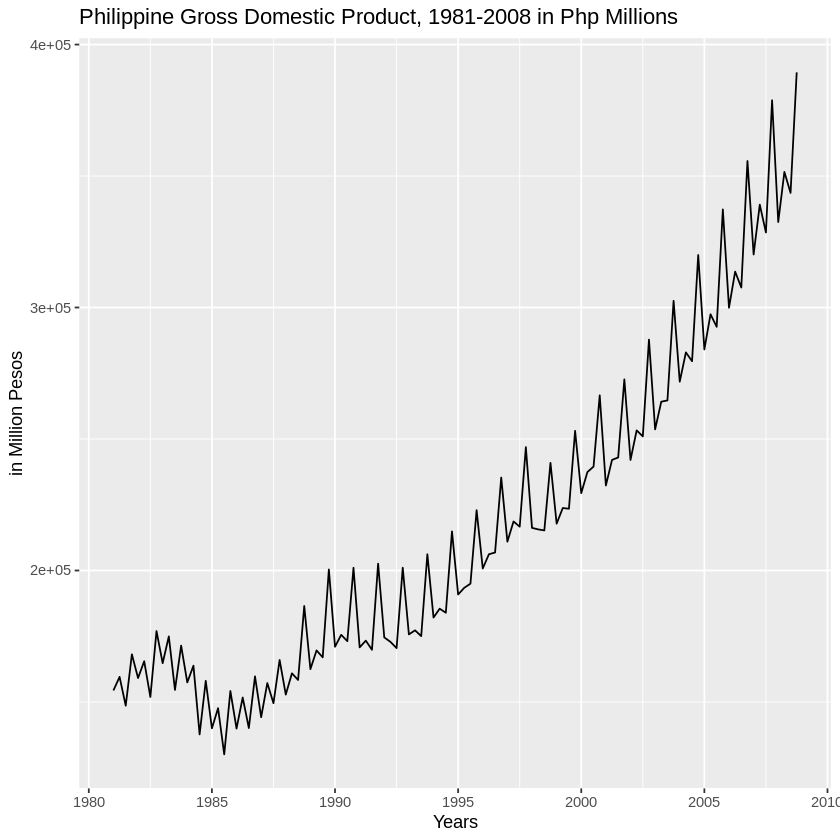

In [20]:
autoplot(gdp) +
  ggtitle("Philippine Gross Domestic Product, 1981-2008 in Php Millions") +
  xlab("Years") +
  ylab("in Million Pesos")

Seasonal Plots

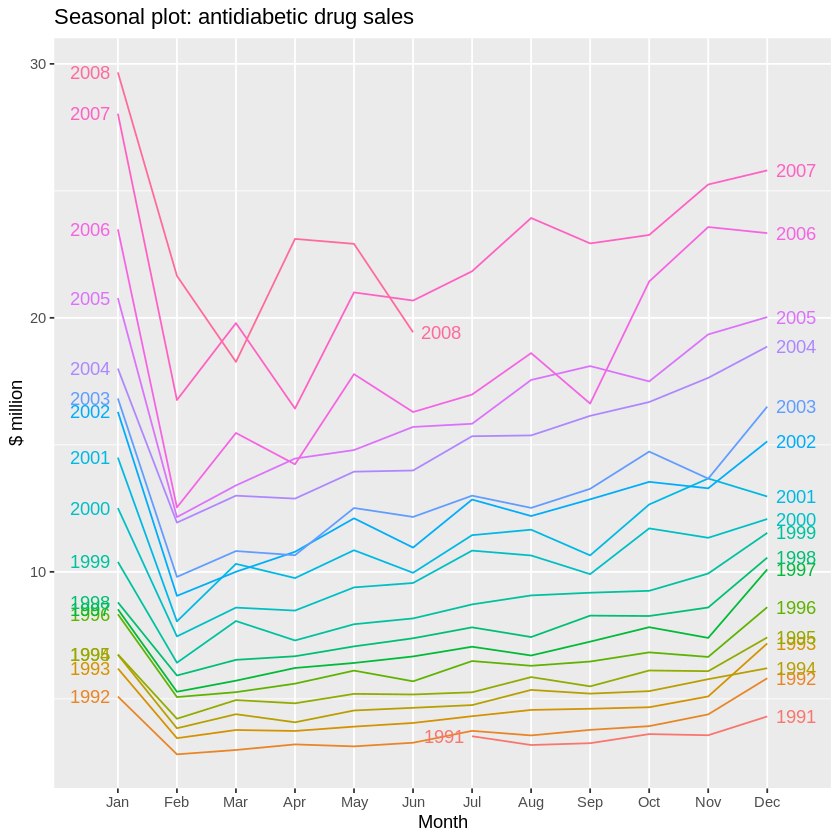

In [21]:
ggseasonplot(a10, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("$ million") +
  ggtitle("Seasonal plot: antidiabetic drug sales")

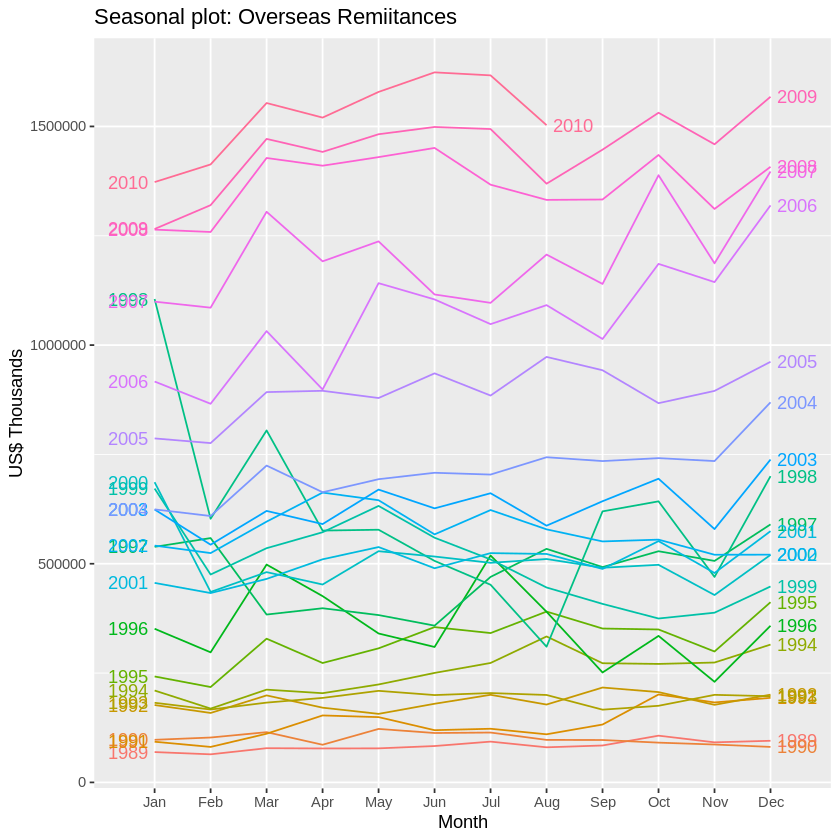

In [22]:
## Remittances

ggseasonplot(remit, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("US$ Thousands") +
  ggtitle("Seasonal plot: Overseas Remiitances")

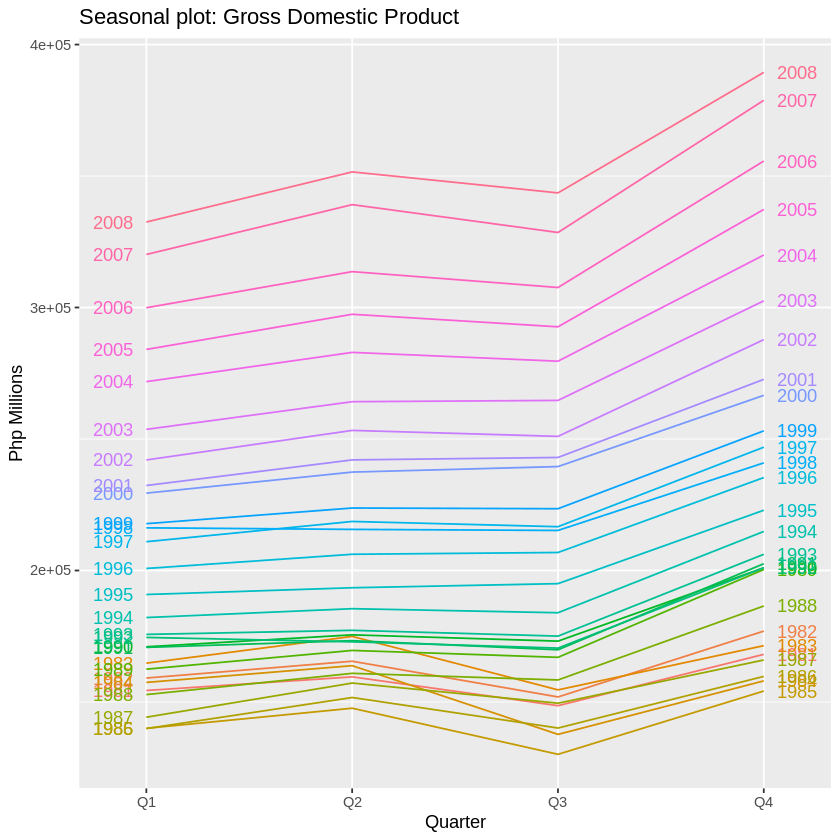

In [23]:
## GDP

ggseasonplot(gdp, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("Php Millions") +
  ggtitle("Seasonal plot: Gross Domestic Product")

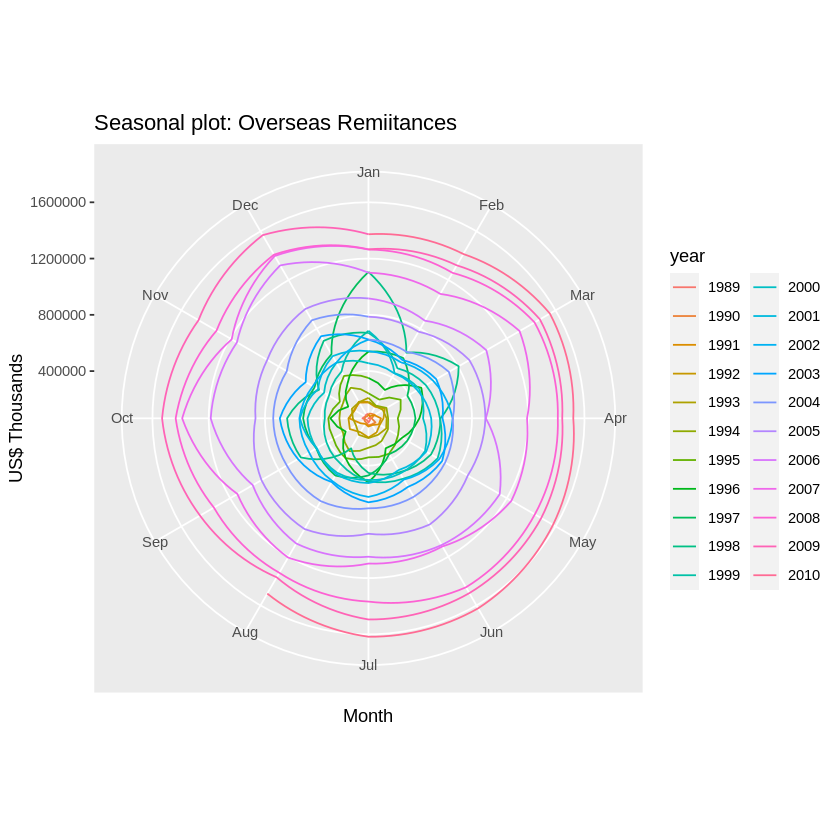

In [24]:
## Polar Plot

ggseasonplot(remit, polar=TRUE) +
  ylab("US$ Thousands") +
  ggtitle("Seasonal plot: Overseas Remiitances")

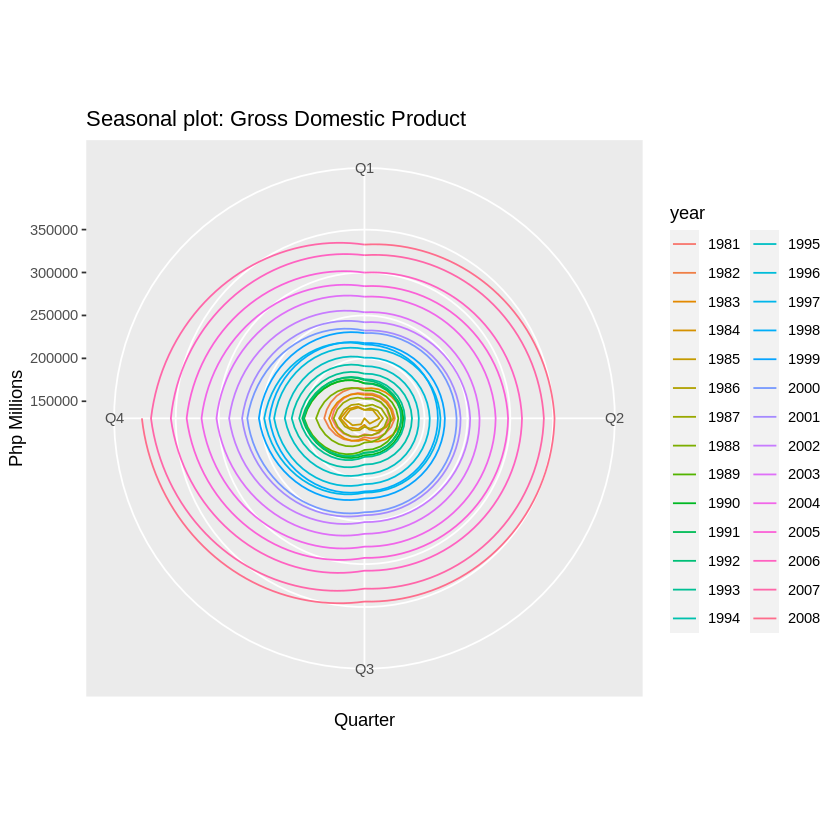

In [25]:

ggseasonplot(gdp, polar=TRUE) +
  ylab("Php Millions") +
  ggtitle("Seasonal plot: Gross Domestic Product")

In [26]:
###

hotelocc <- ts(na.omit(Philmonth$hotel_occupancy), start = c(2000,1), frequency =12)

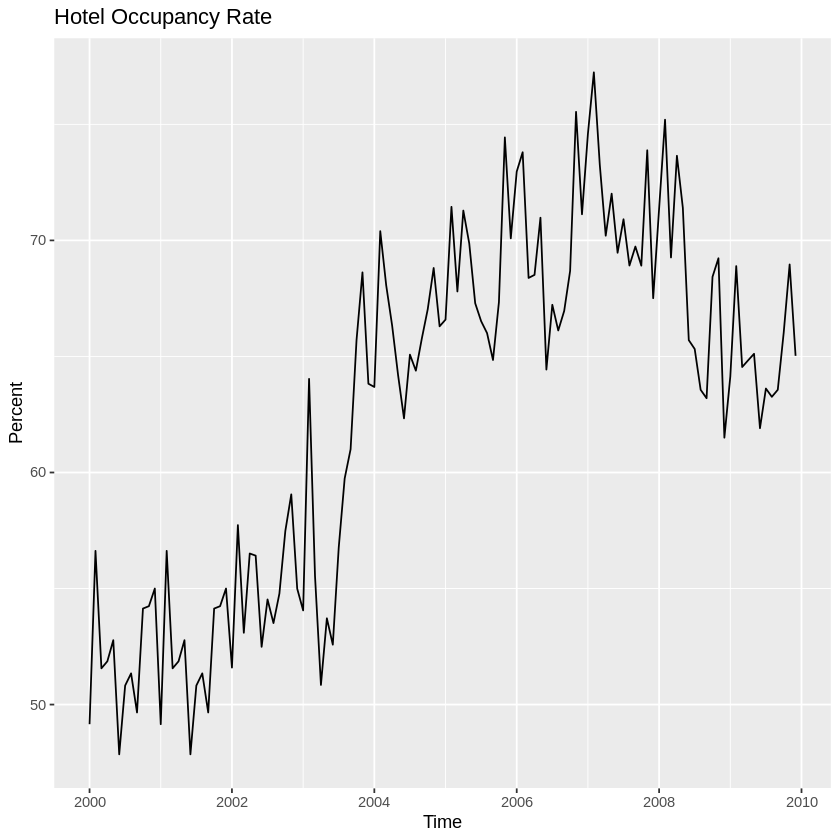

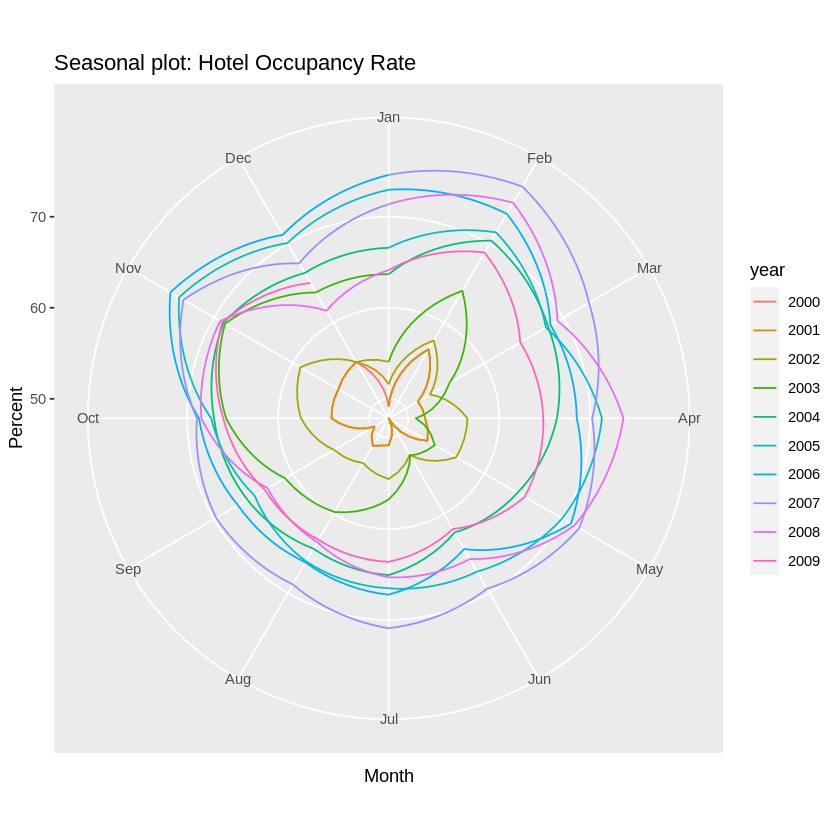

In [28]:
autoplot(hotelocc)+
  ylab("Percent") +
  ggtitle("Hotel Occupancy Rate")

ggseasonplot(hotelocc, polar=TRUE) +
  ylab("Percent") +
  ggtitle("Seasonal plot: Hotel Occupancy Rate")

Seasonal Subseries Plot

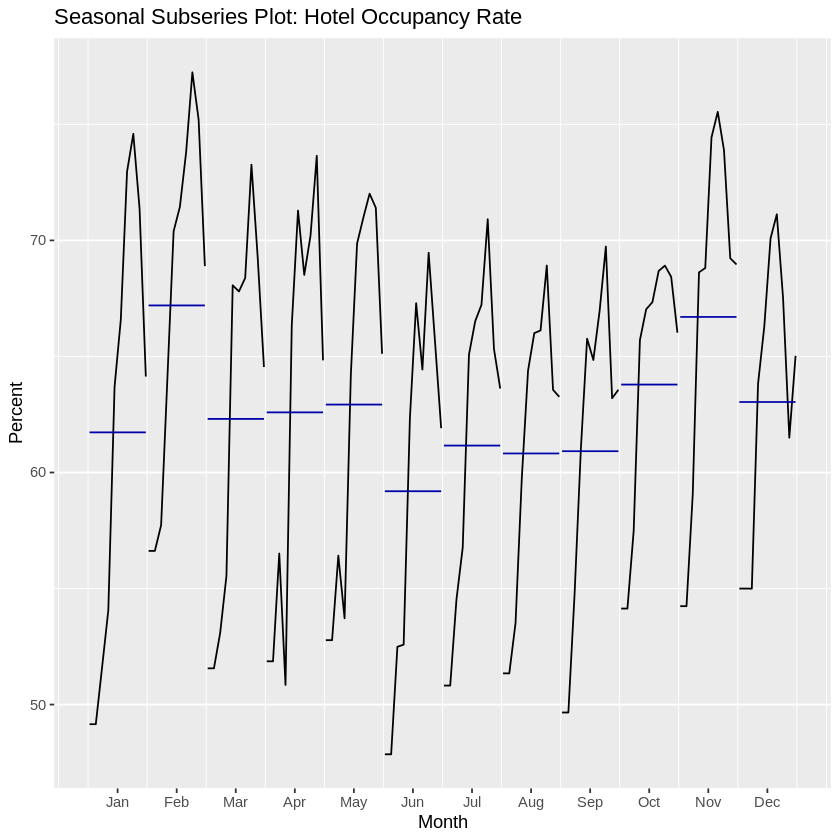

In [29]:
ggsubseriesplot(hotelocc) +
  ylab("Percent") +
  ggtitle("Seasonal Subseries Plot: Hotel Occupancy Rate")